In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Reading the csv into a dataframe.
df_bank = pd.read_csv('https://raw.githubusercontent.com/cmattcasey/ISDS7070/main/bank-additional-full.csv')

In [3]:
# Verifying the data loaded correctly.
df_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check the datatypes and look for null values.
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Renaming columns that contain a "." and replacing with "_"
df_bank.rename(columns={'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed',}, inplace=True)

In [6]:
# Missing values are coded as unknown, replacing with NaN
df_bank.replace('unknown', np.NaN, inplace=True)

We dropped two columns due to lack of useful information. Default showed only 3 instances where someone defaulted on a loan and the metrics for pdays were greatly skewed because every new client was represented by the number '999.' pdays also felt redundant due to the information provided by the 'campaign' and 'previous' columns.

In [7]:
df_bank.drop(columns = ['default', 'pdays'], inplace=True)

In [8]:
# Verifying we now see some columns have null values, new column names and dropped columns
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   housing         40198 non-null  object 
 5   loan            40198 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp_var_rate    41188 non-null  float64
 14  cons_price_idx  41188 non-null  float64
 15  cons_conf_idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr_employed     41188 non-null 

In [9]:
# Viewing the desciptive statistics
df_bank.describe()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Utilizing .value_counts.idxmax() for categorical data to replace missing values with the most common value
df_bank['job'].value_counts().idxmax()

'admin.'

In [11]:
df_bank['education'].value_counts().idxmax()

'university.degree'

In [12]:
df_bank['housing'].value_counts().idxmax()

'yes'

In [13]:
df_bank['loan'].value_counts().idxmax()

'no'

In [14]:
df_bank['marital'].value_counts().idxmax()

'married'

In [15]:
# Replacing missing values with the most common value for each column
df_bank['loan'].replace(np.nan, "no", inplace=True)
df_bank['housing'].replace(np.nan, "yes", inplace=True)
df_bank['education'].replace(np.nan, "university.degree", inplace=True)
df_bank['job'].replace(np.nan, "admin.", inplace=True)
df_bank['marital'].replace(np.nan, "married", inplace=True)

In [16]:
# Verifying we no longer have any missing values
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp_var_rate    41188 non-null  float64
 14  cons_price_idx  41188 non-null  float64
 15  cons_conf_idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr_employed     41188 non-null 

In [17]:
# Many binary columns have yes and no values, replacing with 1 or 0 to for models which require numeric data
df_bank = df_bank.replace({'yes': 1, 'no': 0})

In [18]:
# Converting binary columns into new datatype 'boolean'
df_bank[["housing", "loan",]] = df_bank[["housing", "loan"]].astype("bool")
print(df_bank['housing'].dtypes)
print(df_bank['loan'].dtypes)

bool
bool


In [19]:
# Converting our y variable to integer
df_bank["y"] = pd.to_numeric(df_bank["y"])
print(df_bank["y"].dtypes)

int64


In [20]:
# Verifying replace was successful
df_bank.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,False,False,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,False,False,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,True,False,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,False,False,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,False,True,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
# Grouping education data into Higher Education, Some Education and Little Education
df_bank['education'] = df_bank['education'].replace(['university.degree', 'professional.course'],'higher')
df_bank['education'] = df_bank['education'].replace(['high.school', 'basic.9y', 'basic.6y'],'some')
df_bank['education'] = df_bank['education'].replace(['basic.4y', 'illiterate'],'little')

In [22]:
# Checking counts after replacments
df_bank['education'].value_counts()

higher    19142
some      17852
little     4194
Name: education, dtype: int64

Text(0.5, 1.0, 'age distribution')

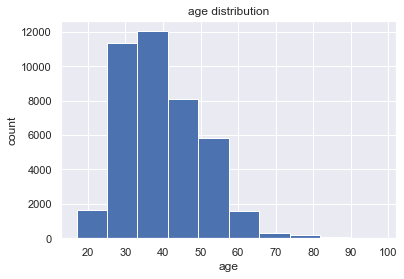

In [23]:
# Creating histogram to view the distrubtion of age
plt.pyplot.hist(df_bank['age'])


# Set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age distribution")

In [24]:
# Creating 4 bins for age
df_bank['bin_age'] = pd.qcut(df_bank.age, q=4, labels=False)

In [25]:
df_bank['bin_age'].value_counts()

0    11176
2    10140
1     9999
3     9873
Name: bin_age, dtype: int64

In [26]:
# Verifying creation of age bins
df_bank['bin_age'].unique()

array([3, 1, 2, 0], dtype=int64)

In [27]:
# Dropping age since we have created bin age
df_bank.drop(columns = ['age'], inplace=True)

In [28]:
##Creating bins for duration
df_bank['bin_duration'] = pd.qcut(df_bank.duration, q=5, labels=False)

In [29]:
df_bank['bin_duration'].unique()

array([3, 2, 1, 4, 0], dtype=int64)

In [30]:
df_bank['bin_duration'].value_counts()

0    8388
2    8274
4    8222
3    8165
1    8139
Name: bin_duration, dtype: int64

In [31]:
##Changing value names to something more meaningful
df_bank['bin_duration'] = df_bank['bin_duration'].replace(0,'HungUp')
df_bank['bin_duration'] = df_bank['bin_duration'].replace(1,'ShortCall')
df_bank['bin_duration'] = df_bank['bin_duration'].replace(2,'AvgCall')
df_bank['bin_duration'] = df_bank['bin_duration'].replace(3,'LongCall')
df_bank['bin_duration'] = df_bank['bin_duration'].replace(4,'LongestCall')

In [32]:
##No longer need duration
df_bank.drop(columns = ['duration'], inplace=True)

In [33]:
##Changing value names to something more meaningful
df_bank['bin_age'] = df_bank['bin_age'].replace(0,'Young')
df_bank['bin_age'] = df_bank['bin_age'].replace(1,'Middle')
df_bank['bin_age'] = df_bank['bin_age'].replace(2,'Old')
df_bank['bin_age'] = df_bank['bin_age'].replace(3,'Older')

In [34]:
##Changing datatypes for dummy variables
df_bank['bin_age'] = df_bank['bin_age'].astype('object')
df_bank['bin_duration'] = df_bank['bin_duration'].astype('object')

In [35]:
df_bank['bin_age'].value_counts()

Young     11176
Old       10140
Middle     9999
Older      9873
Name: bin_age, dtype: int64

In [36]:
df_bank['bin_duration'].value_counts()

HungUp         8388
AvgCall        8274
LongestCall    8222
LongCall       8165
ShortCall      8139
Name: bin_duration, dtype: int64

In [37]:
# Grouping jobs based expected income
# Lower Class Employment Status: student, unemployed, housemaid
# Middle Class Employment Status: blue-collar, technician, retired, services, admin.
# Upper Class Employment Status: management, entrepreneur, self-employed
df_bank['job'] = df_bank['job'].replace(['student', 'unemployed', 'housemaid'],'lower')
df_bank['job'] = df_bank['job'].replace(['blue-collar', 'technician', 'retired', 'services', 'admin.'],'middle')
df_bank['job'] = df_bank['job'].replace(['management', 'entrepreneur', 'self-employed'],'upper')

In [38]:
# Verifying job replacements and counts
df_bank['job'].value_counts()

middle    32438
upper      5801
lower      2949
Name: job, dtype: int64

In [39]:
# This shows how many of each marital category said yes to subscribing to a term deposit
df_bank.groupby(['marital']).y.sum()

marital
divorced     476
married     2544
single      1620
Name: y, dtype: int64

In [40]:
# Calculating the proportion of "yes" by each marital status
print(df_bank[df_bank.marital == 'married'].y.sum()/df_bank[df_bank.marital == 'married'].y.count())

0.1017274472168906


In [41]:
print(df_bank[df_bank.marital == 'single'].y.sum()/df_bank[df_bank.marital == 'single'].y.count())

0.1400414937759336


In [42]:
print(df_bank[df_bank.marital == 'divorced'].y.sum()/df_bank[df_bank.marital == 'divorced'].y.count())

0.10320901994796183


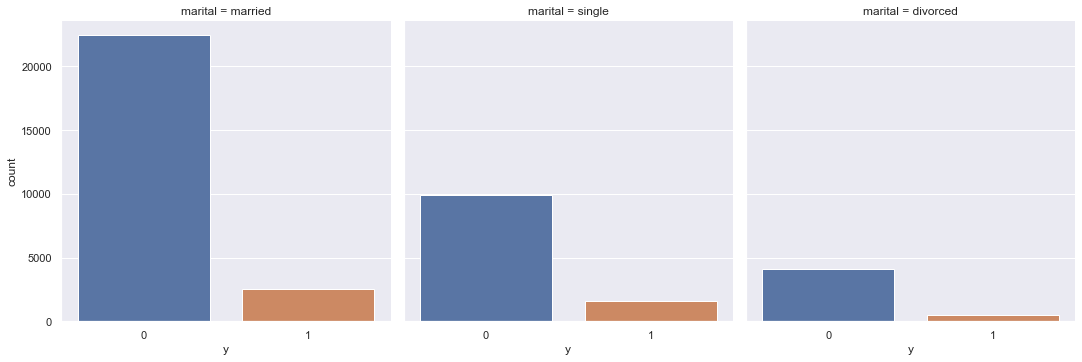

In [43]:
# Exploring marital status impact on subscribed a deposit (y)
sns.catplot(x='y', col='marital', kind='count', data=df_bank, col_wrap=3)

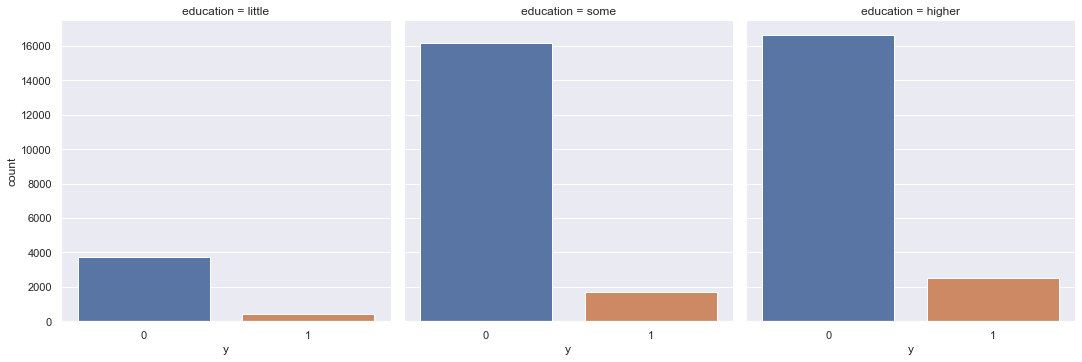

In [44]:
# Exploring education impact on subscribed a deposit (y)
sns.catplot(x='y', col='education', kind='count', data=df_bank, col_wrap=3)

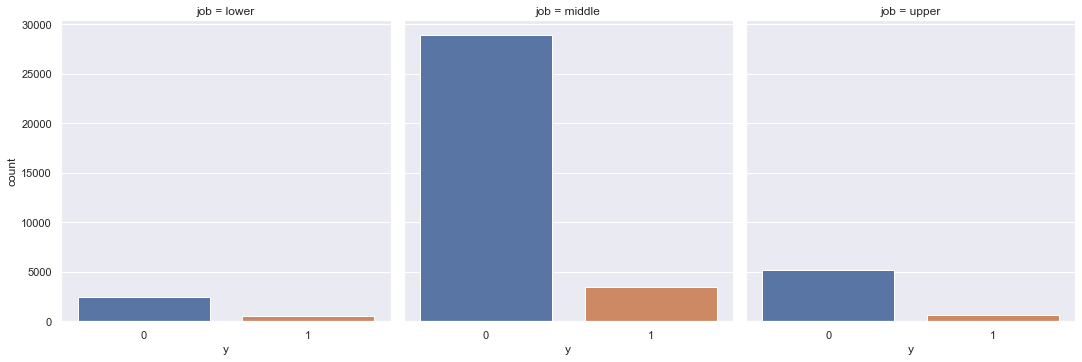

In [45]:
# Exploring job impact on subscribed a deposit (y)
sns.catplot(x='y', col='job', kind='count', data=df_bank, col_wrap=3)

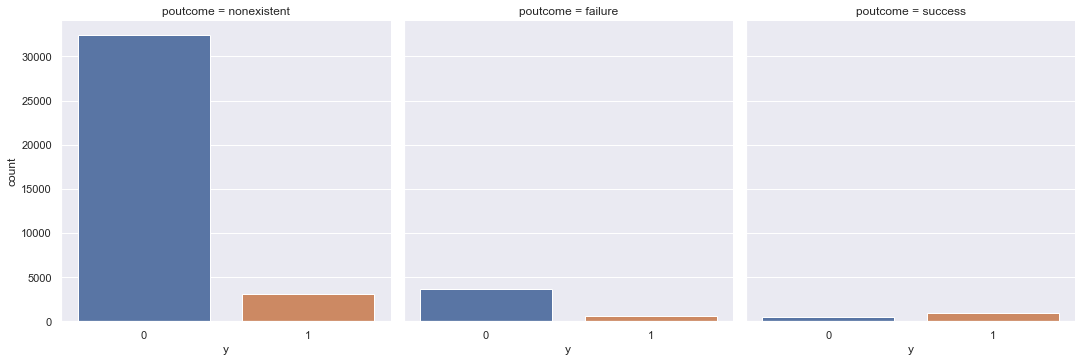

In [46]:
#Exploring previous outcome impact on subscribed a deposit (y)
sns.catplot(x='y', col='poutcome', kind='count', data=df_bank, col_wrap=3)

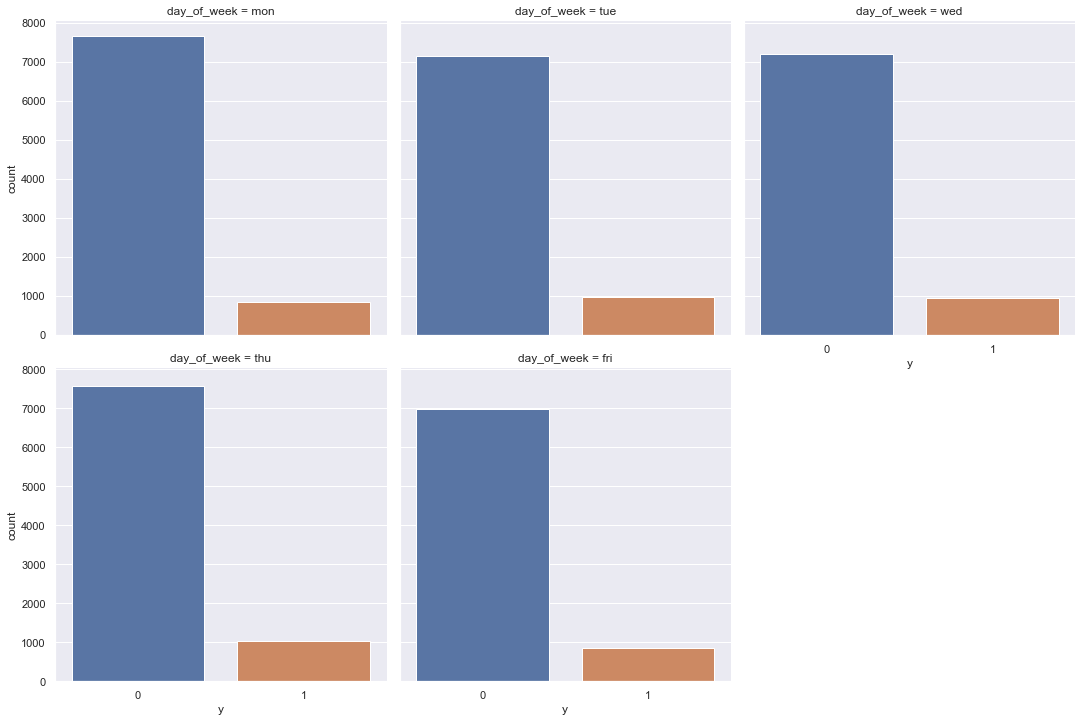

In [47]:
#Exploring if different days of the week impact on subscribed a deposit (y)
sns.catplot(x='y', col='day_of_week', kind='count', data=df_bank, col_wrap=3)

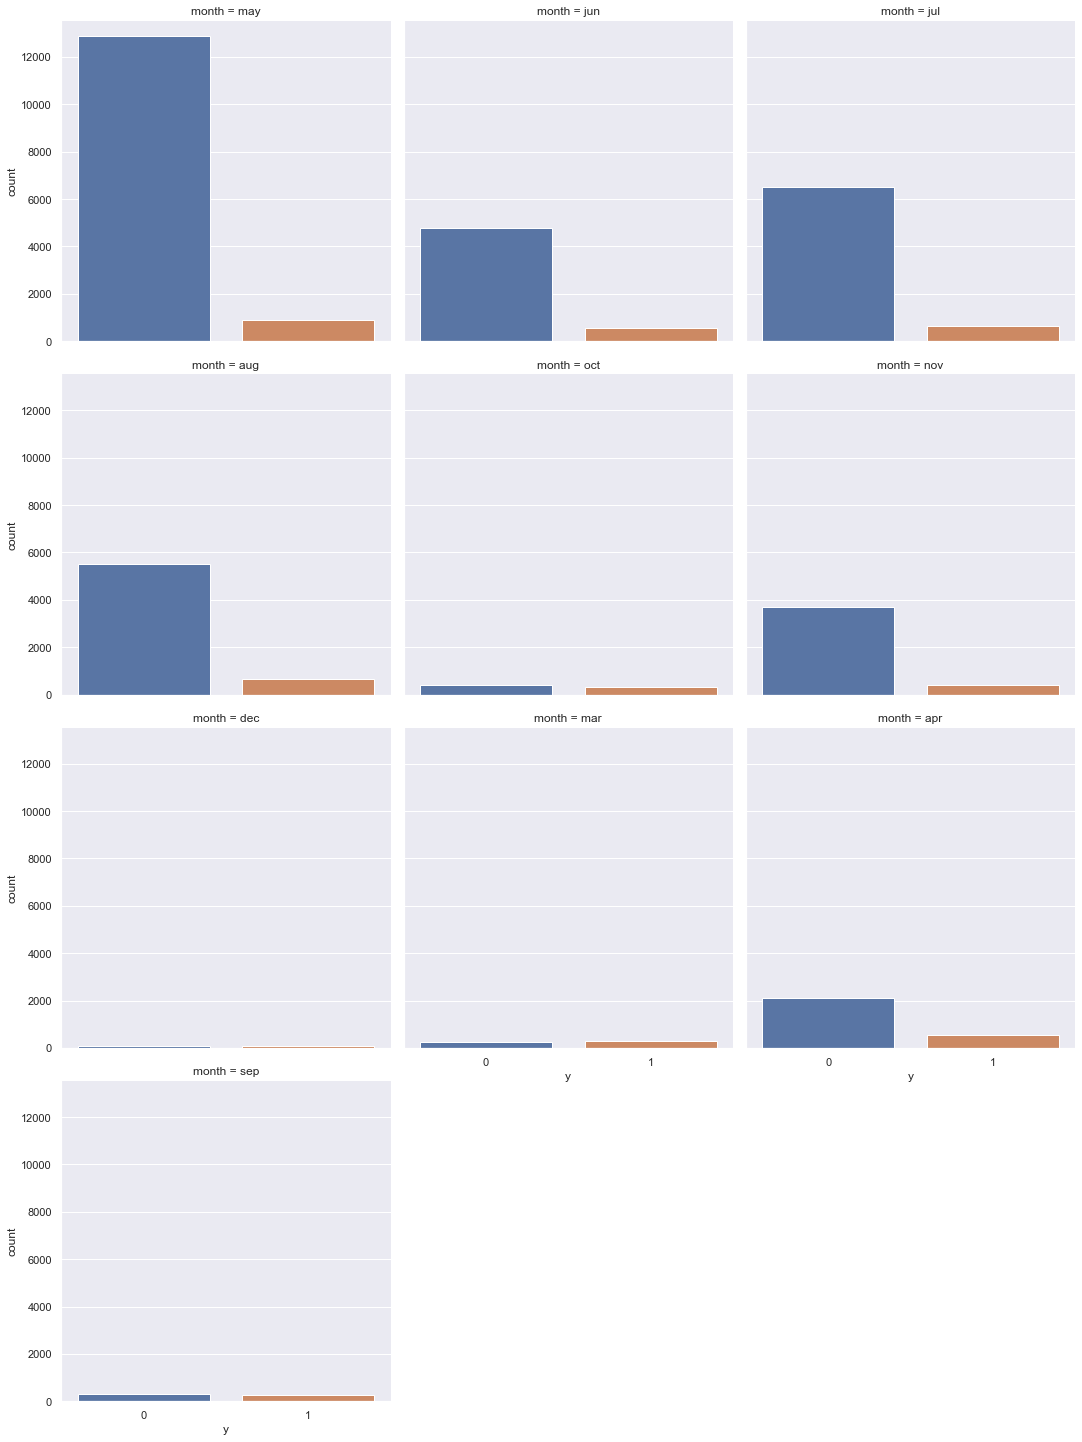

In [48]:
#Exploring if different months impact on subscribed a deposit (y)
sns.catplot(x='y', col='month', kind='count', data=df_bank, col_wrap=3)

In [49]:
##Normalizing Numerical Columns before proceeding with the creation of the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

cols_to_norm = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
df_bank[cols_to_norm] = StandardScaler().fit_transform(df_bank[cols_to_norm])

In [50]:
print(df_bank[cols_to_norm])

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed
0          0.648092        0.722722       0.886447   0.712460     0.331680
1          0.648092        0.722722       0.886447   0.712460     0.331680
2          0.648092        0.722722       0.886447   0.712460     0.331680
3          0.648092        0.722722       0.886447   0.712460     0.331680
4          0.648092        0.722722       0.886447   0.712460     0.331680
...             ...             ...            ...        ...          ...
41183     -0.752343        2.058168      -2.224953  -1.495186    -2.815697
41184     -0.752343        2.058168      -2.224953  -1.495186    -2.815697
41185     -0.752343        2.058168      -2.224953  -1.495186    -2.815697
41186     -0.752343        2.058168      -2.224953  -1.495186    -2.815697
41187     -0.752343        2.058168      -2.224953  -1.495186    -2.815697

[41188 rows x 5 columns]


In [51]:
# Creating dummy variables so that all values are numeric in preparation for modeling
bank_dum = pd.get_dummies(df_bank, drop_first=True)
bank_dum.head()

,housing,loan,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,day_of_week_wed,poutcome_nonexistent,poutcome_success,bin_age_Old,bin_age_Older,bin_age_Young,bin_duration_HungUp,bin_duration_LongCall,bin_duration_LongestCall,bin_duration_ShortCall
0,False,False,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,1,0,0,1,0,0
1,False,False,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,1,0,0,0,0,0
2,True,False,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,0,0,0,1,0,0
3,False,False,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,1,0,0,0,0,0,0
4,False,True,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,1,0,0,1,0,0


In [52]:
# Verifying the creation of new columns
bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing                   41188 non-null  bool   
 1   loan                      41188 non-null  bool   
 2   campaign                  41188 non-null  int64  
 3   previous                  41188 non-null  int64  
 4   emp_var_rate              41188 non-null  float64
 5   cons_price_idx            41188 non-null  float64
 6   cons_conf_idx             41188 non-null  float64
 7   euribor3m                 41188 non-null  float64
 8   nr_employed               41188 non-null  float64
 9   y                         41188 non-null  int64  
 10  job_middle                41188 non-null  uint8  
 11  job_upper                 41188 non-null  uint8  
 12  marital_married           41188 non-null  uint8  
 13  marital_single            41188 non-null  uint8  
 14  educat

In [53]:
# Designating X and y to use in test/train split creation
X = bank_dum[['housing', 'loan', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_middle', 'job_upper', 'marital_married', 'marital_single',
       'education_little', 'education_some', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'bin_age_Old',
       'bin_age_Older', 'bin_age_Young', 'bin_duration_HungUp',
       'bin_duration_LongCall', 'bin_duration_LongestCall',
       'bin_duration_ShortCall']]
y = bank_dum['y']

In [54]:
# Creating test/train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [55]:
#Verifying split functioned correctly
X_train.head()

,housing,loan,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_middle,...,day_of_week_wed,poutcome_nonexistent,poutcome_success,bin_age_Old,bin_age_Older,bin_age_Young,bin_duration_HungUp,bin_duration_LongCall,bin_duration_LongestCall,bin_duration_ShortCall
37983,False,False,1,0,-2.216433,-2.067374,2.312505,-1.628372,-2.069683,1,...,0,1,0,1,0,0,0,0,1,0
21120,False,False,4,0,0.839061,-0.227465,0.951267,0.773575,0.845170,0,...,0,1,0,0,0,0,0,0,0,0
16712,True,False,4,0,0.839061,0.591424,-0.474791,0.773575,0.845170,1,...,1,1,0,0,1,0,0,0,0,1
27073,True,False,2,0,-0.115781,-0.649003,-0.323542,0.230456,0.398115,1,...,0,1,0,0,0,0,1,0,0,0
19516,True,True,1,0,0.839061,-0.227465,0.951267,0.776458,0.845170,0,...,0,1,0,0,1,0,0,0,0,1


In [56]:
y_train.tail(10)

36602    1
23099    0
37300    0
30230    1
4673     0
25725    0
5014     0
22584    0
501      0
20828    0
Name: y, dtype: int64

In [57]:
##We believe that the best course of action would be to create a random forest using our best predictors.
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
##Setting up random forest with parameters
model = RandomForestRegressor(n_estimators=200, max_depth=7, bootstrap=True)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [59]:
y_pred = model.predict(X_test)

In [60]:
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.06361586301031498
R-Squared: 0.37067166522629424


In [61]:
len(model.estimators_)

200

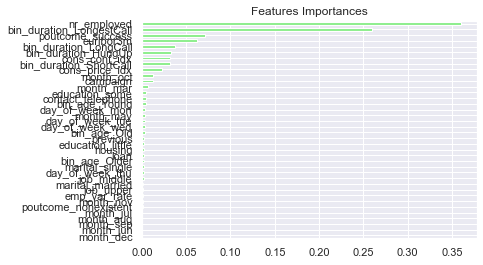

In [62]:
##This plot lists the features in order of importance
import matplotlib.pyplot as plt
##showing the most important features
importances = pd.Series(data=model.feature_importances_,
                        index=X_train.columns)

importances_sorted = importances.sort_values()
                                    
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [63]:
##This list has the same affect as the above plot
feature_importances = pd.DataFrame(data=model.feature_importances_,
                        index=X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                          importance
nr_employed                 0.360122
bin_duration_LongestCall    0.260333
poutcome_success            0.070886
euribor3m                   0.061882
bin_duration_LongCall       0.036963
bin_duration_HungUp         0.032632
cons_conf_idx               0.032003
bin_duration_ShortCall      0.031733
cons_price_idx              0.022664
month_oct                   0.012219
campaign                    0.012052
month_mar                   0.006383
education_some              0.005097
contact_telephone           0.005047
bin_age_Young               0.004209
day_of_week_mon             0.003991
month_may                   0.003939
day_of_week_tue             0.003621
day_of_week_wed             0.003507
bin_age_Old                 0.003437
previous                    0.002727
education_little            0.002715
housing                     0.002655
loan                        0.002487
bin_age_Older               0.002384
marital_single              0.002138
d

In [64]:
##Going to try "fine tuning" using cross validation method
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 50, 100],
    'min_samples_split': [5, 10],
    'max_features': [1,2],
    'n_estimators': [5, 10, 50, 100]
}

In [66]:
model = RandomForestRegressor()

In [67]:
model_grid = GridSearchCV(model, param_grid=param_grid, cv=5)

In [ ]:
model_grid.fit(X_train, y_train)

In [ ]:
model_grid.best_params_

In [ ]:
##Now that the cross validation has given us our best metrics, we will recreate our random forest.
model = RandomForestRegressor(min_samples_leaf=80, n_estimators=70, max_depth=25, min_samples_split=5, bootstrap=True)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)